In [1]:
import geopandas
import libpysal
import momepy
import osmnx
import pandas
import shapely

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [3]:
merged = geopandas.read_file('data/primary.gpkg', layer='tessellation').drop(columns=['uID'])
merged

,tID,sdbHei,stcOri,stbOri,stbCeA,sdcLAL,sdcAre,sscCCo,sscERI,sicCAR,...,xcnSCl,mtdMDi,lddNDe,linWID,lddRea,lddARe,sddAre,midRea,midAre,geometry
0,0,6.0,1.929700,25.521722,23.592022,132.362782,6108.974842,0.443963,0.963349,0.027234,...,0.0,165.060944,0.011227,0.023156,27.0,87003.992934,25355.751505,5.0,40973.912265,"POLYGON ((413453.976 3390496.547, 413453.909 3..."
1,1,21.0,30.908144,27.538281,3.369863,174.851041,7698.605623,0.320616,0.807863,0.077110,...,0.0,165.060944,0.011227,0.023156,27.0,87003.992934,25355.751505,5.0,40973.912265,"POLYGON ((413460.791 3390535.393, 413460.203 3..."
2,2,21.0,30.941455,25.659711,5.281745,179.253539,11548.171040,0.457602,0.906245,0.053695,...,0.0,165.060944,0.011227,0.023156,27.0,87003.992934,25355.751505,5.0,40973.912265,"POLYGON ((413479.709 3390559.201, 413479.606 3..."
3,3,24.0,14.750400,24.572171,9.821771,231.881828,26136.799878,0.618912,0.980027,0.026692,...,0.0,36.400733,0.054944,0.000000,1.0,26136.799878,26136.799878,1.0,26136.799878,"POLYGON ((413481.440 3390644.908, 413481.406 3..."
4,4,3.0,42.437219,31.073709,11.363510,134.826917,8056.969658,0.564324,0.999556,0.010260,...,0.0,62.273834,0.016802,0.024948,9.0,36539.310089,18497.645769,4.0,18497.645769,"POLYGON ((413499.408 3390950.183, 413499.294 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,16432,18.0,25.345461,28.469113,3.123653,62.141040,1505.638836,0.496448,0.988793,0.298462,...,0.0,59.176625,0.020134,0.036607,13.0,10966.943745,1505.638836,8.0,7079.485291,"POLYGON ((413233.422 3390976.899, 413245.608 3..."
16433,16433,21.0,19.496769,18.299125,1.197644,66.726654,1673.244180,0.478488,0.982043,0.334238,...,0.0,71.297850,0.019866,0.034056,6.0,7219.251652,1673.244180,1.0,1673.244180,"POLYGON ((413431.265 3393271.437, 413430.047 3..."
16434,16434,30.0,18.868039,NaN,NaN,26.285402,293.003730,0.539951,1.040335,7.806340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((413455.376 3393493.685, 413458.542 3..."
16435,16435,21.0,18.562788,NaN,NaN,27.921031,241.730889,0.394802,1.001932,9.129023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((413447.358 3393259.226, 413471.664 3..."


In [5]:
queen_3 = libpysal.io.open('data/queen3.gal', 'r').read()
queen_3.neighbors = {int(k): [int(i) for i in v] for k, v in queen_3.neighbors.items()} 

C:\ProgramData\miniconda3\envs\ox\Lib\site-packages\libpysal\io\iohandlers\gal.py:185: UserWarning: The weights matrix is not fully connected: 
 There are 28 disconnected components.
 There are 4 islands with ids: 3044, 15703, 15840, 16384.
  w = W(neighbors, id_order=ids)


## Understanding the context

Measure first, second and third quartile of distribution of values within an area around each building.

In [6]:
%%time
percentiles = []
for column in merged.columns.drop(["tID","geometry"]):
    perc = momepy.Percentiles(merged, column, queen_3, "tID", verbose=False).frame
    perc.columns = [f"{column}_" + str(x) for x in perc.columns]
    percentiles.append(perc)

CPU times: total: 13min 32s
Wall time: 13min 32s


In [7]:
percentiles_joined = pandas.concat(percentiles, axis=1)
percentiles_joined.head()

,sdbHei_25,sdbHei_50,sdbHei_75,stcOri_25,stcOri_50,stcOri_75,stbOri_25,stbOri_50,stbOri_75,stbCeA_25,...,lddARe_75,sddAre_25,sddAre_50,sddAre_75,midRea_25,midRea_50,midRea_75,midAre_25,midAre_50,midAre_75
0,13.5,21.0,21.0,12.085625,22.777749,30.924800,25.590716,29.055693,31.036983,4.325804,...,90966.759638,13024.293844,20486.956132,25355.751505,4.0,5.0,7.5,27484.550901,35559.167754,40973.912265
1,6.0,18.0,21.0,12.108198,23.577794,30.979756,25.590716,30.667675,33.094275,1.750888,...,92007.886273,6348.832166,9359.344184,21926.698637,4.5,6.0,10.0,16379.387406,26092.693783,36691.552017
2,6.0,16.5,21.0,16.796717,25.322546,29.130941,25.944304,29.521675,31.339167,1.895330,...,87607.514236,5611.384029,7485.569443,10480.775457,4.0,6.0,10.0,11467.953702,16379.387406,26048.587688
3,6.0,15.0,21.0,19.530961,25.982338,28.462898,25.687363,28.646386,30.530991,1.318217,...,87003.992934,3232.840213,6750.859006,10455.601193,4.0,6.0,7.0,8606.195257,15853.733900,18482.591107
4,6.0,15.0,18.0,20.255196,26.621098,28.673797,26.229728,28.690505,30.241994,1.949760,...,38244.845784,4374.713540,6546.948078,10480.775457,4.0,4.5,7.0,9216.202666,13474.955471,18467.536444


See the difference between original coverage area ratio and spatially lagged one.

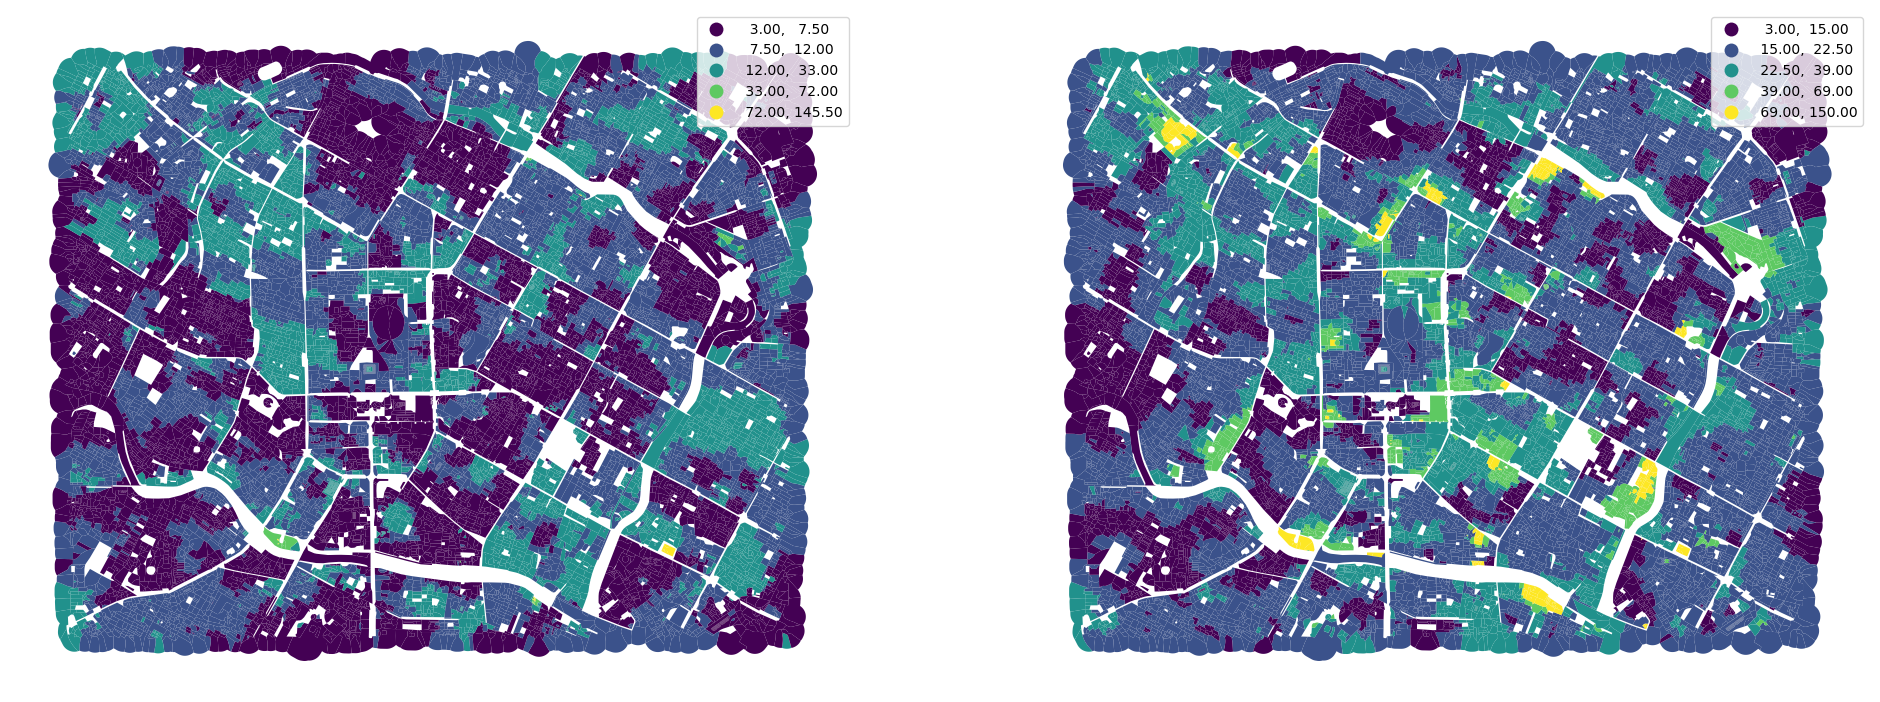

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

merged.plot(percentiles_joined['sdbHei_25'].values, ax=ax[0], scheme="natural_breaks", legend=True)
merged.plot(percentiles_joined['sdbHei_75'].values, ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_axis_off()
ax[1].set_axis_off()

In [9]:
standardized = (percentiles_joined - percentiles_joined.mean()) / percentiles_joined.std()
standardized.head()

,sdbHei_25,sdbHei_50,sdbHei_75,stcOri_25,stcOri_50,stcOri_75,stbOri_25,stbOri_50,stbOri_75,stbCeA_25,...,lddARe_75,sddAre_25,sddAre_50,sddAre_75,midRea_25,midRea_50,midRea_75,midAre_25,midAre_50,midAre_75
0,0.709920,0.844569,-0.063991,-0.889608,-0.276590,0.197462,0.314722,0.331082,0.233271,4.090786,...,3.223029,5.049431,4.682203,3.864862,-0.038204,-0.257444,-0.188926,4.129278,3.385613,2.829966
1,-0.658263,0.420485,-0.063991,-0.887307,-0.190498,0.204085,0.314722,0.485263,0.441610,0.765631,...,3.282494,2.025531,1.669129,3.209469,0.108962,-0.045206,0.245842,2.075883,2.219806,2.417007
2,-0.658263,0.208443,-0.063991,-0.409454,-0.002748,-0.018713,0.346456,0.375652,0.263873,0.952158,...,3.031161,1.691476,1.161759,1.021816,-0.038204,-0.045206,0.245842,1.167736,1.023602,1.390680
3,-0.658263,-0.003599,-0.063991,-0.130780,0.068251,-0.099218,0.323396,0.291934,0.182030,0.206895,...,2.996690,0.614026,0.962818,1.017004,-0.038204,-0.045206,-0.275880,0.638584,0.958867,0.661072
4,-0.658263,-0.003599,-0.321224,-0.056966,0.136987,-0.073803,0.372072,0.296153,0.152763,1.022447,...,0.211744,1.131280,0.907604,1.021816,-0.038204,-0.363563,-0.275880,0.751377,0.665918,0.659620


In [10]:
standardized.to_parquet('data/contextual.pq')